#### Hi all. 🙋

#### Nice to meet you!
#### It describes a specific type, and does not explain which type it is. 
#### If you use the LightGBM algorithm, you can apply the category type as it is, 
#### but if you want to use the NN model, the linear model, and the decision model, 
#### this process is essential. Let's learn how to switch to fit the data you're using.

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Import Data</center></h1>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [2]:
train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# data segmentation
X = train.drop('HeartDisease', axis=1)
y = train['HeartDisease']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0) # train, valid 8:2 분할

In [4]:
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,M,ASY,140,0,1,Normal,157,Y,2.0,Flat
356,46,M,ASY,115,0,0,Normal,113,Y,1.5,Flat
738,65,F,NAP,160,360,0,LVH,151,N,0.8,Up
85,66,M,ASY,140,139,0,Normal,94,Y,1.0,Flat
427,59,M,ASY,140,0,0,ST,117,Y,1.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
835,54,M,ASY,110,239,0,Normal,126,Y,2.8,Flat
192,48,M,ATA,130,245,0,Normal,160,N,0.0,Up
629,57,F,ASY,128,303,0,LVH,159,N,0.0,Up
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down


**Save it as a function because you need to apply different changes over and over again.**

In [5]:
# We need to duplicate the original state of our training data and test data.
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

# Functions that return training data and test data
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

In [6]:
# Store the category type to be converted into a list
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">One-Hot Encoding</center></h1>
</div>

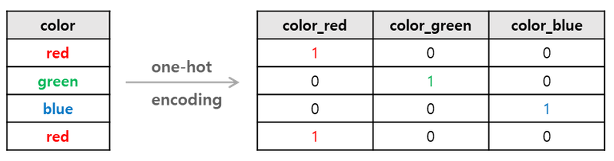

#### One-Hot encoding is the most representative treatment for categorical variables. 
#### For each level of a categorical variable, create a variable with two values, 0 and 1, 
#### indicating whether it is at that level or not. Therefore, applying One-Hot encoding to a categorical 
#### variable with n levels produces n features of the variable with two values ​​(0,1). This is called a dummy variable.

In [7]:
train_x, test_x = load_data()

In [8]:
train_x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,M,ASY,140,0,1,Normal,157,Y,2.0,Flat
356,46,M,ASY,115,0,0,Normal,113,Y,1.5,Flat
738,65,F,NAP,160,360,0,LVH,151,N,0.8,Up
85,66,M,ASY,140,139,0,Normal,94,Y,1.0,Flat
427,59,M,ASY,140,0,0,ST,117,Y,1.0,Flat


In [9]:
# Combining training data and test data to perform one-hot encoding through get_dummies
all_x = pd.concat([train_x, test_x])
all_x = pd.get_dummies(all_x, columns=cat_cols)

# Repartition of training data and test data
train_x = all_x.iloc[:train_x.shape[0], :].reset_index(drop=True)
test_x = all_x.iloc[train_x.shape[0]:, :].reset_index(drop=True)

In [10]:
train_x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,70,140,0,1,157,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
1,46,115,0,0,113,1.5,0,1,1,0,0,0,0,1,0,0,1,0,1,0
2,65,160,360,0,151,0.8,1,0,0,0,1,0,1,0,0,1,0,0,0,1
3,66,140,139,0,94,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
4,59,140,0,0,117,1.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0


<div style="background-color: #FFBB00; border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Label Encoding</center></h1>
</div>

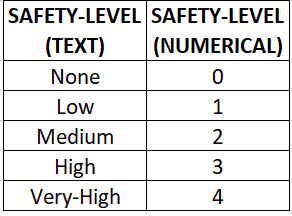

#### Label encoding simply converts each level to an integer. 
#### For example, label-encoding a categorical variable with 5 levels turns each level into a number from 0 to 4.
#### I would normally see the level as a string and change it to an index listed alphabetically.
#### Most of the index numbers in alphabetical order have no intrinsic meaning. 
#### Therefore, unless it is based on a decision tree model, it is not very appropriate to directly use the 
#### features converted by label encoding for training.

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
train_x, test_x = load_data()

In [13]:
for c in cat_cols:
    # Transform data after defining based on training data
    le = LabelEncoder()
    le.fit(train_x[c])
    train_x[c] = le.transform(train_x[c])
    test_x[c] = le.transform(test_x[c])

In [14]:
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,1,0,140,0,1,1,157,1,2.0,1
356,46,1,0,115,0,0,1,113,1,1.5,1
738,65,0,2,160,360,0,0,151,0,0.8,2
85,66,1,0,140,139,0,1,94,1,1.0,1
427,59,1,0,140,0,0,2,117,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
835,54,1,0,110,239,0,1,126,1,2.8,1
192,48,1,1,130,245,0,1,160,0,0.0,2
629,57,0,0,128,303,0,0,159,0,0.0,2
559,64,1,0,134,273,0,1,102,1,4.0,0


<div style="background-color:#F261AA;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Feature Hashing</center></h1>
</div>

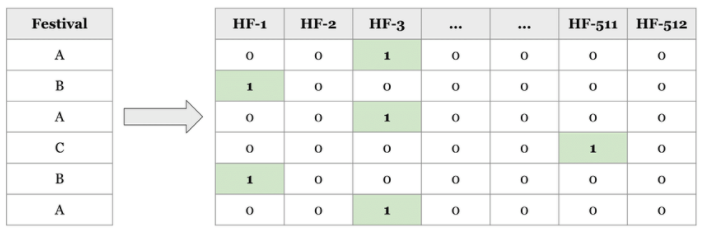

#### After conversion to One-Hot encoding, the number of features equals the number of levels in the category. 
#### Feature Hashing is a transformation that reduces the number. The number of features after conversion is determined first, 
#### and the position to display the flag is determined for each level using a hash function.
#### One-hot encoding displays flags in different positions for each level, but in Feature Hashin, since the number of features determined 
#### after transformation is less than the number of levels in a category, it is possible to display flags in the same position at different levels by calculation according to the hash function.

In [15]:
from sklearn.feature_extraction import FeatureHasher

In [16]:
train_x, test_x = load_data()

In [17]:
for c in cat_cols:
    # The usage of FeatureHasher is slightly different from other encoders.
    fh = FeatureHasher(n_features=5, input_type='string')

    # After converting the variable to a string, apply FeatureHasher.
    hash_train = fh.transform(train_x[[c]].astype(str).values)
    hash_test = fh.transform(test_x[[c]].astype(str).values)

    # Change the DataFrame
    hash_train = pd.DataFrame(hash_train.todense(), columns=[f'{c}_{i}' for i in range(5)])
    hash_test = pd.DataFrame(hash_test.todense(), columns=[f'{c}_{i}' for i in range(5)])

    # Combine with original dataframe
    train_x = pd.concat([train_x, hash_train], axis=1)
    test_x = pd.concat([test_x, hash_test], axis=1)

In [18]:
# Delete the original categorical variable
train_x.drop(cat_cols, axis=1, inplace=True)
test_x.drop(cat_cols, axis=1, inplace=True)

In [19]:
train_x

#### This method is not often used because feature hahing frequently generates null values ​​and can respond with GBDT after label encoding

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,Sex_2,Sex_3,...,ExerciseAngina_0,ExerciseAngina_1,ExerciseAngina_2,ExerciseAngina_3,ExerciseAngina_4,ST_Slope_0,ST_Slope_1,ST_Slope_2,ST_Slope_3,ST_Slope_4
0,40.0,140.0,289.0,0.0,172.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54.0,150.0,195.0,0.0,122.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57.0,140.0,241.0,0.0,123.0,0.2,NaN,NaN,NaN,NaN,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
913,45.0,110.0,264.0,0.0,132.0,1.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
915,57.0,130.0,131.0,0.0,115.0,1.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0


<div style="background-color:#47C832;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Frequency Encoding</center></h1>
</div>

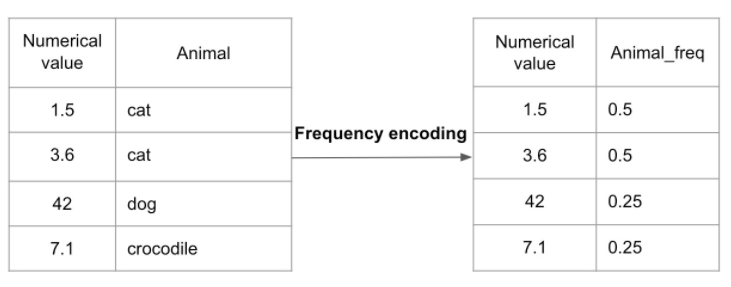

#### Frequency encoding is a method of replacing categorical variables with the number or frequency of occurrences of each level. 
#### It is valid when there is a relationship between the frequency of appearance of each level and the objective variable. (To check the relationship with the target variable, there is a way to check the Correlation value.)
#### It can also be used as a variant of label encoding to create an index that lists by frequency rather than alphabetically. However, be careful as there are times when the value of the tie rate occurs.

In [20]:
train_x, test_x = load_data()

In [21]:
for c in cat_cols:
    freq = train_x[c].value_counts()
    # Replaced by the number of occurrences of a category
    train_x[c] = train_x[c].map(freq)
    test_x[c] = test_x[c].map(freq)

In [22]:
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,579,391,140,0,1,445,157,301,2.0,364
356,46,579,391,115,0,0,445,113,301,1.5,364
738,65,155,162,160,360,0,144,151,433,0.8,318
85,66,579,391,140,139,0,445,94,301,1.0,364
427,59,579,391,140,0,0,145,117,301,1.0,364
...,...,...,...,...,...,...,...,...,...,...,...
835,54,579,391,110,239,0,445,126,301,2.8,364
192,48,579,145,130,245,0,445,160,433,0.0,318
629,57,155,391,128,303,0,144,159,433,0.0,318
559,64,579,391,134,273,0,445,102,301,4.0,52


<div style="background-color:#FA2D7D;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Target Encoding</center></h1>
</div>

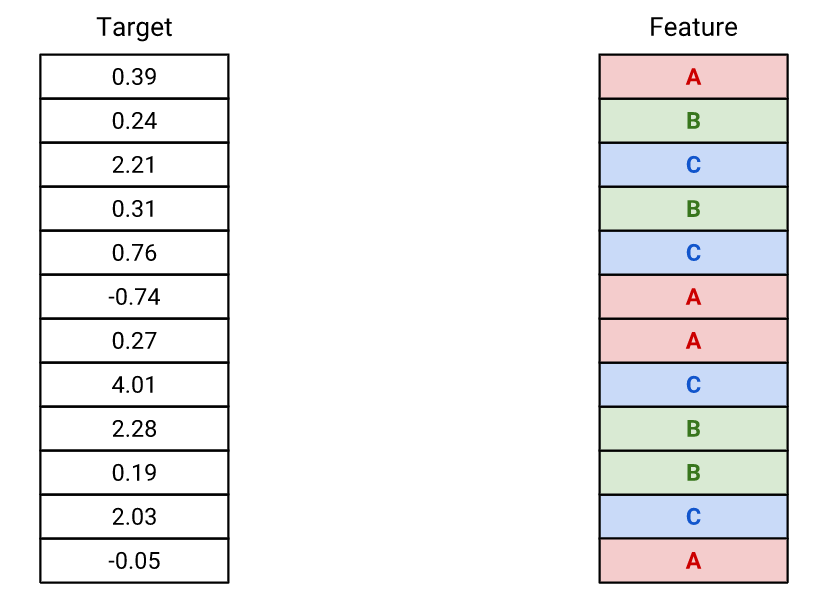
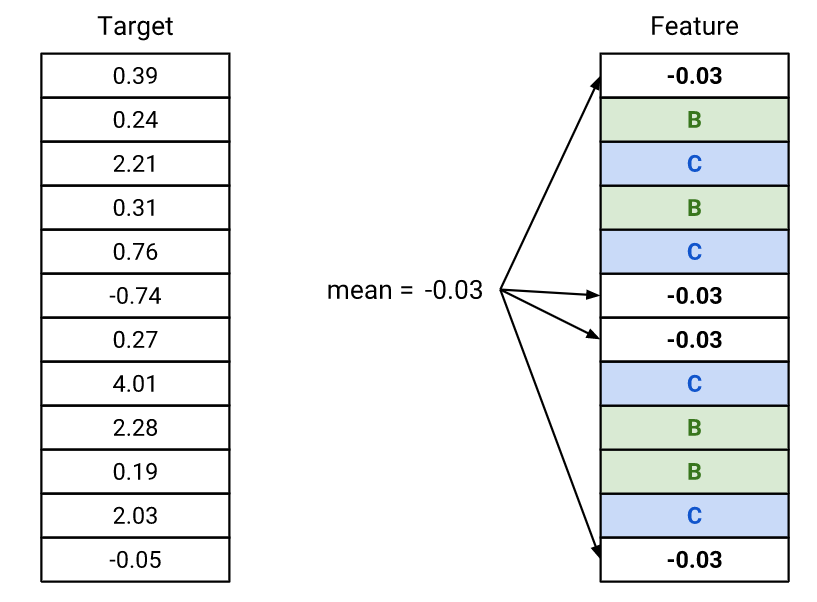
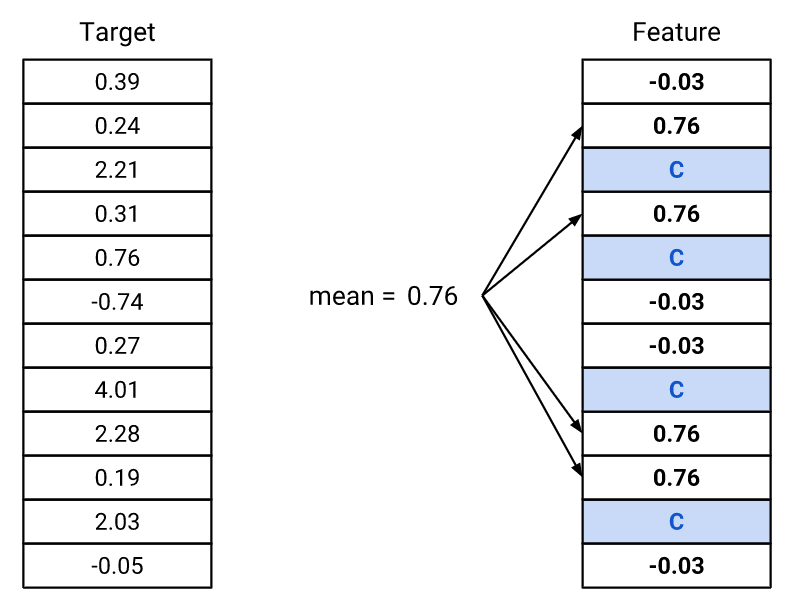
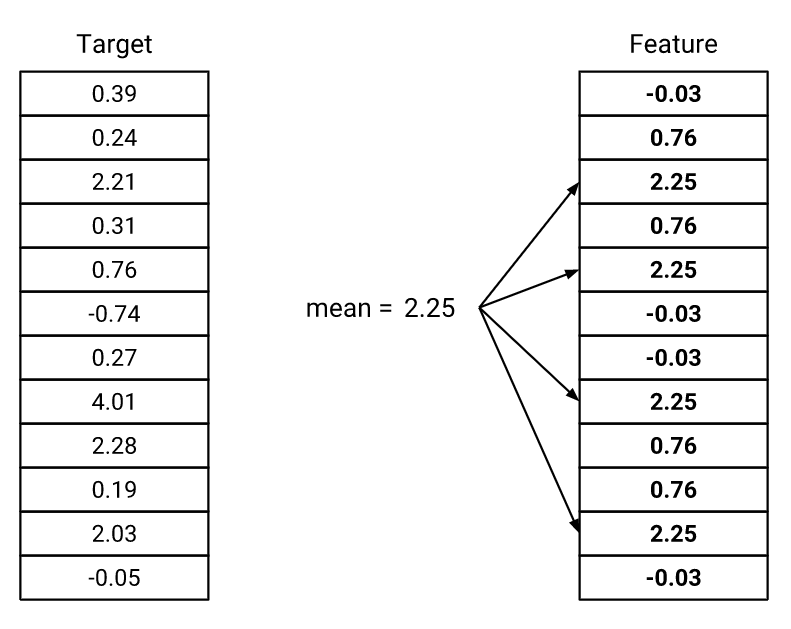

#### Target encoding is a method of converting a categorical variable into a numeric variable using an objective variable. 
#### The basic concept is that the average value of the target variable in each level group of the categorical variable is aggregated as training data and replaced with the value.

## Tip
#### Target encoding can be a very effective feature, but it may not have much effect depending on the data. 
#### In particular, in data with a strong time series tendency, the frequency of occurrence of categories may change over time, 
#### so simple aggregation by category does not reflect temporal changes in many cases, so it is often not a good feature. On the other hand, there is a risk of data information of the target variable being leaked.

In [23]:
from sklearn.model_selection import KFold

In [24]:
train_x, test_x = load_data()

In [25]:
for c in cat_cols:
    # Calculate the target mean for each category across the training data
    data_tmp = pd.DataFrame({c: train_x[c], 'target': train_y})
    target_mean = data_tmp.groupby(c)['target'].mean()

    # Change the category of test data
    test_x[c] = test_x[c].map(target_mean)

    # Prepare an array to store values ​​after transforming the training data
    tmp = np.repeat(np.nan, train_x.shape[0])

    kf = KFold(n_splits=4, shuffle=True, random_state=72)
    for idx_1, idx_2 in kf.split(train_x):
        # Calculate the mean of each categorical objective variable out of fold
        target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
        # Store the converted value in a date array
        tmp[idx_2] = train_x[c].iloc[idx_2].map(target_mean)

    train_x[c] = tmp

In [26]:
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,0.615034,0.784512,140,0,1,0.513514,157,0.842342,2.0,0.839416
356,46,0.618605,0.780822,115,0,0,0.508824,113,0.828194,1.5,0.844444
738,65,0.278261,0.388430,160,360,0,0.562500,151,0.348765,0.8,0.175966
85,66,0.618605,0.780822,140,139,0,0.508824,94,0.828194,1.0,0.844444
427,59,0.631944,0.804878,140,0,0,0.638889,117,0.867841,1.0,0.836431
...,...,...,...,...,...,...,...,...,...,...,...
835,54,0.615034,0.784512,110,239,0,0.513514,126,0.842342,2.8,0.839416
192,48,0.621560,0.140187,130,245,0,0.510703,160,0.348765,0.0,0.175966
629,57,0.262712,0.804878,128,303,0,0.551402,159,0.331269,0.0,0.192469
559,64,0.615034,0.784512,134,273,0,0.513514,102,0.842342,4.0,0.756757


<div style="background-color:#D5D5D5;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Target Encoding - For each fold in cross-validation</center></h1>
</div>

#### If the average is simply obtained from all the data, it is converted into a categorical variable with the target variable value of the row data to be converted, resulting in information leakage. 
#### Therefore, it must be converted so that the target variable of the row data to be converted is not used.
#### If the average value of the target variable is calculated by the out-of-fold method in which the training data is divided into folds for target encoding, and each fold is calculated with data other than its own fold, 
#### the value of the target variable of the row data to be converted is not included in the calculation. can be converted The number of folds for coding is 4-10. On the other hand,
#### in the test data, the average value of the target variables of the entire training data is calculated and transformed.

In [27]:
from sklearn.model_selection import KFold

In [28]:
train_x, test_x = load_data()

In [29]:
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):

    # Distinguish between training data and validation data in training data
    tr_x, va_x = train_x.iloc[tr_idx].copy(), train_x.iloc[va_idx].copy()
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # Iterate over variables to perform target encoding
    for c in cat_cols:
        # Calculate the target mean for each category across the training data
        data_tmp = pd.DataFrame({c: tr_x[c], 'target': tr_y})
        target_mean = data_tmp.groupby(c)['target'].mean()
        # Category substitution of validation data
        va_x.loc[:, c] = va_x[c].map(target_mean)

        # Prepare an array to store values ​​after transforming the training data
        tmp = np.repeat(np.nan, tr_x.shape[0])
        kf_encoding = KFold(n_splits=4, shuffle=True, random_state=72)
        for idx_1, idx_2 in kf_encoding.split(tr_x):
            # Calculating the average of the objective variable for each category in out of fold
            target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
            # Storing values ​​in date array after conversion
            tmp[idx_2] = tr_x[c].iloc[idx_2].map(target_mean)

        tr_x.loc[:, c] = tmp

    # Storing encoded features as needed and allowing them to be read later.

In [30]:
train_x = pd.concat([tr_x,va_x])
train_y = pd.concat([tr_y,va_y])
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,0.617737,0.774194,140,0,1,0.471311,157,0.875000,2.0,0.822917
738,65,0.220930,0.311828,160,360,0,0.612903,151,0.337165,0.8,0.208333
85,66,0.607251,0.798077,140,139,0,0.482490,94,0.859756,1.0,0.811881
427,59,0.617737,0.774194,140,0,0,0.644737,117,0.875000,1.0,0.822917
75,46,0.625387,0.361702,150,163,0,0.492308,116,0.326531,0.0,0.190217
...,...,...,...,...,...,...,...,...,...,...,...
804,70,0.616972,0.330709,160,269,0,0.485119,112,0.865116,2.9,0.818182
277,52,0.616972,0.782007,170,223,0,0.485119,126,0.865116,1.5,0.818182
707,54,0.616972,0.782007,124,266,0,0.587719,109,0.865116,2.2,0.818182
192,48,0.616972,0.127273,130,245,0,0.485119,160,0.327381,0.0,0.198381


<div style="background-color:#F15F5F;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Target Encoding - When matching the fold split of the cross-validation and the fold of the target encoding</center></h1>
</div>

#### As mentioned earlier when cross-validating, target encoding requires retransformation for each fold of cross-validation. 
#### This is because conversion is required again to prevent the target variable of the verification data from being included in the variable. 
#### That is, in each fold of cross-validation, training data excluding validation data is divided into folds for target encoding and converted.

In [31]:
train_x, test_x = load_data()

from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True, random_state=71)

# Looping a variable to perform target encoding
for c in cat_cols:

    data_tmp = pd.DataFrame({c: train_x[c], 'target': train_y})
    
    tmp = np.repeat(np.nan, train_x.shape[0])

    # Divide the validation data from the training data
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        # Calculating the average of the objective variable for each category on the training data
        target_mean = data_tmp.iloc[tr_idx].groupby(c)['target'].mean()
        # 검증 데이터에 대해 변환 후 값을 날짜 배열에 저장
        tmp[va_idx] = train_x[c].iloc[va_idx].map(target_mean)

    train_x[c] = tmp

In [32]:
train_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,0.637615,0.803390,140,0,1,0.526786,157,0.848889,2.0,0.835088
356,46,0.605023,0.773519,115,0,0,0.490964,113,0.821739,1.5,0.819188
738,65,0.267241,0.385246,160,360,0,0.540541,151,0.343465,0.8,0.180672
85,66,0.637615,0.803390,140,139,0,0.526786,94,0.848889,1.0,0.835088
427,59,0.637615,0.803390,140,0,0,0.657143,117,0.848889,1.0,0.835088
...,...,...,...,...,...,...,...,...,...,...,...
835,54,0.621495,0.781879,110,239,0,0.520833,126,0.853982,2.8,0.852830
192,48,0.605023,0.105263,130,245,0,0.490964,160,0.317757,0.0,0.165289
629,57,0.295082,0.781879,128,303,0,0.588785,159,0.336420,0.0,0.169421
559,64,0.621495,0.781879,134,273,0,0.520833,102,0.853982,4.0,0.813953


<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Category Embedding</center></h1>
</div>

#### Category embedding is a method of using a continuous value or a continuous value vector representing the characteristics of a category value instead of a category value.

#### For example, in the case of a categorical value indicating the name of an athlete, the athlete's age, annual salary, physical ability, etc. are used instead. As another example, 
#### in the case of a category value indicating a region name, the area, population, etc. of the corresponding region may be used.

#### However, when embedding is used, there is a burden of selecting features according to the purpose of data analysis and investigating additional data outside the current data.